## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].sum()*100/len(df)

11.965919355605513

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.groupby(['group','landing_page'])['converted'].count()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
Name: converted, dtype: int64

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[(df['group']=='treatment')==(df['landing_page']=='new_page')]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique(), len(df2)

(290584, 290585)

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(2893).reset_index(drop = True)
df2.shape

(290584, 5)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2[df2['converted']==1]['user_id'].count()/len(df2)

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df2[df2['group']=='control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df2[df2['group']=='treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
df2[df2['landing_page']=='new_page']['user_id'].count()/len(df2)

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

* According to the obtained results, we almost have the same probability of conversion from the new and the old page. Plus, the probability of having a new or an old page are almost the same 0.50006 and 0.49994. Therefore, we cannot conclude on which page leads to more conversions. We have to do a hypothesis testing.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* $H_0:$ The old page leads to a higher conversion rate than the new page i.e.: 
$$H_0: p_{new} - p_{old} \leq 0$$
* $H_1:$ (We want to prove this one) The new page leads to a higher conversion rate than the old page i.e.: 
$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = df2[df2['group']=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = df2[df2['group']=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = df2[df2['group']=='treatment'].sample(n_new, replace=True)
new_page_converted.head(5)

,user_id,timestamp,group,landing_page,converted
13327,743790,2017-01-09 02:18:40.923948,treatment,new_page,0
112397,660583,2017-01-18 07:38:11.967208,treatment,new_page,0
258225,921572,2017-01-11 02:00:13.123484,treatment,new_page,0
130315,857513,2017-01-03 12:00:25.697544,treatment,new_page,0
34708,756357,2017-01-10 22:54:54.368424,treatment,new_page,0


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = df2[df2['group']=='control'].sample(n_old, replace=True)
old_page_converted.head(5)

,user_id,timestamp,group,landing_page,converted
239929,919210,2017-01-06 23:29:08.638959,control,old_page,0
278577,637961,2017-01-09 07:26:56.740919,control,old_page,0
117468,884838,2017-01-15 16:54:28.039601,control,old_page,0
19306,693192,2017-01-13 16:47:18.245013,control,old_page,0
75169,693758,2017-01-07 19:40:48.572538,control,old_page,0


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted['converted'].mean() - old_page_converted['converted'].mean()

-0.003484874995486331

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_sam = df2[df2['group']=='treatment'].sample(n_new, replace=True)
    old_sam = df2[df2['group']=='control'].sample(n_old, replace=True)
    p_diffs.append(new_sam['converted'].mean() - old_sam['converted'].mean())
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

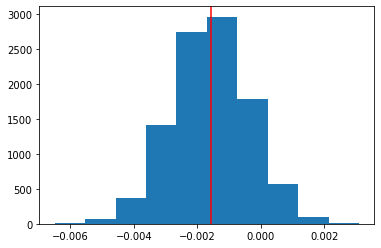

In [34]:
observed = df2[df2['group']=='treatment']['converted'].mean() - df2[df2['group']=='control']['converted'].mean()
plt.hist(p_diffs)
plt.axvline(observed, color='red')
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
p_diffs.mean(), p_diffs.std()

(-0.0015693283757995272, 0.0012071661311433089)

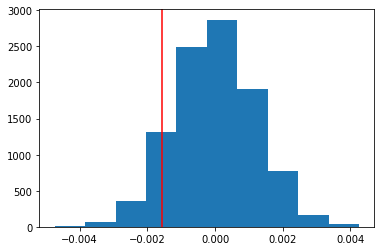

In [37]:
n_2_val = np.random.normal(0, p_diffs.std(), 10000)
plt.hist(n_2_val)
plt.axvline(observed, color='red')
plt.show()

In [38]:
(n_2_val>observed).mean()

0.9079

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* The value we computed in part j is called p-value which is the probability of observing our statistic (or a more extreme in favor of $H_1$) if the null hypothesis $H_0$ is true. 
* Generally, this values is compared to the fixed threshold of type I error $\alpha$. If ($p-value < \alpha$) then the null hypothesis is rejected and $H_1$ is validated. Otherwise, we fail to reject $H_0$. 
* In this case, with $\alpha=0.05$ we have failed to reject the null hypothesis that states that both new and old pages have the same conversion rates.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2[df2["group"]=='control']
convert_new = df2[df2['group']=='treatment']
n_old = convert_old.shape[0]
n_new = convert_new.shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
counts = np.array([convert_old['converted'].sum(), 
                   convert_new['converted'].sum()])
nobs = np.array([n_old, n_new])
zstat, pval = sm.stats.proportions_ztest(counts, nobs, alternative='smaller')
zstat, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* Here, the z-score presents the number of standard deviations between the observed average and the mean of the distribution. The p-value, in this case, is also bigger than the type I error threshold $\alpha=0.05$. This confirms that we fail to reject the null hypothesis of having $p_{old} = p_{new}$. 
* This result agree with the findings in parts j. and k. Plus, the p-value is almost the same as found manually.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

* The dependent variable in our case is binary (0 or 1). And, it represents a category conversion if equals to 1 and no conversion if equals to 0. This is a two classes classification problem. Hence, we need to performe a Logistic Regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [28]:
df2['intercept'] = 1 
df2['dummy_group'] = df2['group'].apply(lambda x : 1 if x=='treatment' else 0)
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [29]:
log_reg = sm.Logit(df2['converted'], df2[['intercept', 'dummy_group']])
results = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [30]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-03 09:46 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
dummy_group  -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* First let's remember that when using regression model the null and the alternative hypothesis are defined in terms of equals ($=$) and different ($\neq$) respectively. Therefore for this Logistic Regression model the null and alternative hypothesis are defined as follow: 
* The null hypothesis $H_0$: The conversion rate of the new page is equal to the conversion rate of the old page: 
$$H_0: p_{new} - p_{old} = 0$$
* The alternative hypothesis $H_1$: The conversion rate of the new page is different from the conversion rate of the old page: 
$$H_1: p_{new} - p_{old} \neq 0$$ 
* This explains why the p_value obtained from the statistic model (0.1899) is different from the p_value obtained in part II. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* In our case, knowing only what page the individual saw cannot help us in determining whether he will convert or not. Maybe there are other factors that could influence the individual's behaviour. One can think of the time the individual saw the page i.e. during work hours or late at night, whether during working days or weekends. The country of origin can also be a good factor. In the next parts, we will try to answer the question about whether the country where a user is living affects its behiavour for conversion. 
* However, adding other features that are not pertinent could be misleading and causes the results to diverge from reality. Adding too much features will also causes the model to become more compicated and the interpration of the coefficient to become more difficult. Therefore, we should find the number of features that serves as a good compromise.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [31]:
countries_df = pd.read_csv('countries.csv')
countries_df.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [32]:
df3 = df2.merge(countries_df, right_on='user_id', left_on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


Let's check if we still have the same number of data points.

In [33]:
df2.shape[0], df3.shape[0]

(290584, 290584)

Good we haven't lose any data point. Now let's see what values are contained in the **country** feature. 

In [38]:
df3['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

So three possible values: US for the United State, UK for the United Kingdom, and CA for Canada. To get the dummy variable for the country feature we are going to need 2 variables. 

In [39]:
df3 = pd.get_dummies(df3, prefix_sep='_', prefix = ['country'],
                     columns = ['country'], drop_first=True)
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1


Let's create a new Logistic Regression model based only on the countries of the individuals and check the characteristics of the model.

In [40]:
log_mod_2 = sm.Logit(df3['converted'], df3[['intercept', 'country_UK', 'country_US']])
results_2 = log_mod_2.fit()
results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-03 10:47 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

Based on the given results, the countries present a lightly less improved p_value. However, with the given value of 0.074 we still fails to reject the null hypothesis. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

Let's first see a model that contains both features the page on conversion and the country.

In [41]:
log_mod_3 = sm.Logit(df3['converted'], df3[['intercept', 'dummy_group', 'country_UK', 'country_US']])
results_3 = log_mod_3.fit()
results_3.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-03 11:02 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
dummy_group   -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

Well this model does not present any new information about the features. 

Let's now think of finding the intersection between the group (or the page) and the country of the individual. Let's create the variables that would describe the intersection of control and treatment groups with the countries.

In [48]:
df3['ctrl_UK'] = (1-df3['dummy_group'])*df3['country_UK']
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0


In [49]:
df3['treatment_UK'] = df3['dummy_group']* df3['country_UK']
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0


In [50]:
df3['ctrl_US'] = (1-df3['dummy_group'])*df3['country_US']
df3['treatment_US'] = df3['dummy_group']* df3['country_US']
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK,ctrl_US,treatment_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0,1,0


In [53]:
df3['ctrl_CA'] = (1-df3['dummy_group'])*(1-df3['country_US']-df3['country_UK'])
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK,ctrl_US,treatment_US,ctr_CA,ctrl_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0,1,0,0,0


Let's check if we have any problems.

In [54]:
sum_f = df3[['ctrl_UK', 'ctrl_US', 'ctrl_CA', 'treatment_UK', 'treatment_US']].apply(np.sum, axis=1)
(sum_f>1).sum()

0

In [57]:
sum_f.value_counts()

1    283283
0      7301
dtype: int64

In [58]:
log_mod_intersect = sm.Logit(df3['converted'],
                             df3[['intercept', 'ctrl_UK', 'ctrl_US', 'ctrl_CA', 'treatment_UK', 'treatment_US']])
results_intersect = log_mod_intersect.fit()
results_intersect.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-03 11:19 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0715    0.0371  -55.7977  0.0000  -2.1442  -1.9987
ctrl_UK        0.0792    0.0405    1.9573  0.0503  -0.0001   0.1586
ctrl_US        0.0850    0.0384    2.2157  0.0267   0.0098   0.1601
ctrl_CA        0.0674    0.0520    1.2967  0.1947  -0.0345   0.1694
treatment_UK   0.0901    0.0405    2.2252  0.0261   0.0107   0.1694
treatment_US   0.0644    0.0384    1.6788  0.0932  -0.0108   0.1396
==================================================================

"""

Well in this model, we have some interesting results. The p_value for the intersection of old page and individuals from US and new page and individuals from UK have a statistically significance of the results of the conversion rates. 

## How about the weekday?

Let's see if the individual consult the website during weekdays or weekends has an influence of his conversion choice. 

Let's find the day of the week of the page visit.

In [59]:
df3['timestamp'] = pd.to_datetime(df3['timestamp'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK,ctrl_US,treatment_US,ctr_CA,ctrl_CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0,1,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0,1,0,0,0


In [60]:
df3['weekday'] = df3['timestamp'].apply(lambda x: 'workday' if x.weekday()<=4 else 'weekend')
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK,ctrl_US,treatment_US,ctr_CA,ctrl_CA,weekday
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0,1,0,0,0,weekend
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0,1,0,0,0,workday
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0,workday
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0,weekend
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0,1,0,0,0,weekend


In [61]:
df3['dummy_weekday'] = df3['weekday'].apply(lambda x: 1 if x=='workday' else 0)
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK,ctrl_US,treatment_US,ctr_CA,ctrl_CA,weekday,dummy_weekday
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0,1,0,0,0,weekend,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0,1,0,0,0,workday,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0,workday,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0,weekend,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0,1,0,0,0,weekend,0


In [62]:
date_mod = sm.Logit(df3['converted'], df3[['intercept', 'dummy_weekday']])
r = date_mod.fit()
r.summary2()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-03 11:36 AIC:              212782.0661
No. Observations:   290584           BIC:              212803.2254
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9958   0.0109 -182.7276 0.0000 -2.0172 -1.9744
dummy_weekday    -0.0007   0.0128   -0.0511 0.9593 -0.0258  0.0245
==================================================================

"""

Alone, finding out if the person visited on weekend or on workday is completely insignficant. And we fail to reject the null hypothesis that visiting on weekends has the same effect as visiting on workdays on the conversion rate.

Does an intersection of the new/old page and the weekday has a significant effect of the conversion rate? Let's check this out! 

In [63]:
df3['new_workday'] = df3['dummy_group'] * df3['dummy_weekday']
df3['old_workday'] = (1-df3['dummy_group']) * df3['dummy_weekday']
df3['new_weekend'] = df3['dummy_group'] * (1-df3['dummy_weekday'])
df3.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,dummy_group,country_UK,country_US,ctrl_UK,treatment_UK,ctrl_US,treatment_US,ctr_CA,ctrl_CA,weekday,dummy_weekday,new_workday,old_workday,new_weekend
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,0,1,0,0,1,0,0,0,weekend,0,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,0,1,0,0,1,0,0,0,workday,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0,workday,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,0,0,1,0,0,weekend,0,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,0,1,0,0,1,0,0,0,weekend,0,0,0,0


In [64]:
model_intersection = sm.Logit(df3['converted'],
                              df3[['intercept','new_workday', 'old_workday', 'new_weekend']])
res = model_intersection.fit()
res.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-03 11:57 AIC:              212781.6631
No. Observations:   290584           BIC:              212823.9817
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9733    0.0153  -129.0175  0.0000  -2.0033  -1.9433
new_workday  -0.0249    0.0180    -1.3824  0.1669  -0.0602   0.0104
old_workday  -0.0214    0.0180    -1.1891  0.2344  -0.0567   0.0139
new_weekend  -0.0455    0.0218    -2.0820  0.0373  -0.0883  -0.0027
==================================================================

"""

As the results shows the intersection of new pages and weekends seems to be the only one presenting a p-value lower than the fixed level of type I error. 

<a id='conclusions'></a>
## Conclusion

As we saw along this project the type of page the user sees does not have an influence on whether or not he decides to the convert. Through statistical study we failed to reject this null hypothesis. We also find out that the country of the user alone doesn't have an influence either. However, combinaison of the two features, in some cases present a statistical significance. 

But from a practical point of view, this country-type of page combinaison is not quite interesting. Because changeing the web page would have an influence on certain countries from others. And since in general the conversion rate is not influenced by the type of page it would be practical to avoid the investment in changing the page because it will not have a big return on investment. 

In [97]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0